# Klaviyo Code Screen 

> This is **Sungryong Hong** (shongscience@gmail.com), an applicant for the data scientist position at **Klaviyo**. 

## 1. Import basic libraries

In [1]:
# My Basic Libraries 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.spatial import cKDTree
import gc


pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None
#pd.set_option("display.precision", 10)


## 2. Read and Explore the data using `pandas`

In [2]:
# Read data
rawdf = pd.read_csv("./screening_exercise_orders_v201810.csv", low_memory=False)

In [3]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
customer_id         13471 non-null int64
gender              13471 non-null int64
date                13471 non-null object
value               13471 non-null float64
predicted_gender    13471 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [4]:
rawdf.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customer_id,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
gender,0,0,1,1,0,1,1,0,0,1
date,2017-01-01 00:11:31,2017-01-01 00:29:56,2017-01-01 01:30:31,2017-01-01 01:34:22,2017-01-01 03:11:54,2017-01-01 10:08:05,2017-01-01 15:42:57,2017-01-01 15:59:50,2017-01-01 18:01:04,2017-01-01 19:27:17
value,198.5,338,733,772,508,338,1526.43,168,207.99,283
predicted_gender,1,1,1,1,1,0,1,0,0,1


### 2.1 Convert  the `date` column to `order_time`

In [5]:
%%time
rawdf['order_time'] = pd.to_datetime(rawdf.date)

CPU times: user 3.05 ms, sys: 377 µs, total: 3.42 ms
Wall time: 3.14 ms


In [6]:
rawdf.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customer_id,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
gender,0,0,1,1,0,1,1,0,0,1
date,2017-01-01 00:11:31,2017-01-01 00:29:56,2017-01-01 01:30:31,2017-01-01 01:34:22,2017-01-01 03:11:54,2017-01-01 10:08:05,2017-01-01 15:42:57,2017-01-01 15:59:50,2017-01-01 18:01:04,2017-01-01 19:27:17
value,198.5,338,733,772,508,338,1526.43,168,207.99,283
predicted_gender,1,1,1,1,1,0,1,0,0,1
order_time,2017-01-01 00:11:31,2017-01-01 00:29:56,2017-01-01 01:30:31,2017-01-01 01:34:22,2017-01-01 03:11:54,2017-01-01 10:08:05,2017-01-01 15:42:57,2017-01-01 15:59:50,2017-01-01 18:01:04,2017-01-01 19:27:17


### 2.2 GroupBy `customer_id` 

In [7]:
len(rawdf.customer_id.unique())

8814

In [8]:
grouped = rawdf.groupby('customer_id')

In [9]:
len(grouped.groups.keys())

8814

## 3. Questions

### (A) Assemble a dataframe: 

> Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.

#### A quick check for any inconsistent gender markers for each `customer_id`

In [10]:
grouped.gender.nunique().describe()

count    8814.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: gender, dtype: float64

> No error in gender labels; they are all unique and consistent. 

#### Assemble `df` from `rawdf`

In [11]:
df = pd.concat([grouped.gender.agg(lambda x:x.value_counts().index[0]).rename('gender'),\
                grouped.order_time.agg('max').rename('most_recent_order_date'),\
                grouped.order_time.nunique().rename('order_count')],axis=1).reset_index()

> We do not need to find the most-frequent gender for each `customer_id` by `lambda x:x.value_counts().index[0]`, since we already know the labels are all consistent. But, if there are some errors in gender labels, this will be one of the most acceptable choices to fill each gender for `customer_id` group. 

In [12]:
df.sort_values(by=['customer_id']).head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### (B) Plot the count of orders per week for the store

In [13]:
rawdf['order_week'] = rawdf.order_time.dt.week

In [14]:
rawdf.head(20)

,customer_id,gender,date,value,predicted_gender,order_time,order_week
0,1000,0,2017-01-01 00:11:31,198.50,1,2017-01-01 00:11:31,52
1,1001,0,2017-01-01 00:29:56,338.00,1,2017-01-01 00:29:56,52
2,1002,1,2017-01-01 01:30:31,733.00,1,2017-01-01 01:30:31,52
3,1003,1,2017-01-01 01:34:22,772.00,1,2017-01-01 01:34:22,52
4,1004,0,2017-01-01 03:11:54,508.00,1,2017-01-01 03:11:54,52
5,1005,1,2017-01-01 10:08:05,338.00,0,2017-01-01 10:08:05,52
6,1006,1,2017-01-01 15:42:57,1526.43,1,2017-01-01 15:42:57,52
7,1007,0,2017-01-01 15:59:50,168.00,0,2017-01-01 15:59:50,52
8,1008,0,2017-01-01 18:01:04,207.99,0,2017-01-01 18:01:04,52
9,1009,1,2017-01-01 19:27:17,283.00,1,2017-01-01 19:27:17,52


In [15]:
rawdf.tail(10)

,customer_id,gender,date,value,predicted_gender,order_time,order_week
13461,9286,1,2017-12-31 20:58:40,158.60,1,2017-12-31 20:58:40,52
13462,9806,1,2017-12-31 21:08:36,375.40,1,2017-12-31 21:08:36,52
13463,9807,0,2017-12-31 21:24:08,237.35,0,2017-12-31 21:24:08,52
13464,9808,1,2017-12-31 21:39:27,222.76,0,2017-12-31 21:39:27,52
13465,9809,1,2017-12-31 21:39:33,606.40,1,2017-12-31 21:39:33,52
13466,9810,1,2017-12-31 22:16:20,794.44,0,2017-12-31 22:16:20,52
13467,9811,1,2017-12-31 22:24:06,148.60,0,2017-12-31 22:24:06,52
13468,9812,0,2017-12-31 23:01:10,153.00,1,2017-12-31 23:01:10,52
13469,9813,0,2017-12-31 23:11:02,534.00,1,2017-12-31 23:11:02,52
13470,8658,0,2017-12-31 23:35:09,306.60,1,2017-12-31 23:35:09,52


> Due to the duplicated week labels of `52`, let's replace the week labels for all orders on 2017-01-01 with `0`

In [16]:
rawdf['order_week'].loc[rawdf.order_time < '2017-01-02'] = 0

In [17]:
rawdf.head(20)

,customer_id,gender,date,value,predicted_gender,order_time,order_week
0,1000,0,2017-01-01 00:11:31,198.50,1,2017-01-01 00:11:31,0
1,1001,0,2017-01-01 00:29:56,338.00,1,2017-01-01 00:29:56,0
2,1002,1,2017-01-01 01:30:31,733.00,1,2017-01-01 01:30:31,0
3,1003,1,2017-01-01 01:34:22,772.00,1,2017-01-01 01:34:22,0
4,1004,0,2017-01-01 03:11:54,508.00,1,2017-01-01 03:11:54,0
5,1005,1,2017-01-01 10:08:05,338.00,0,2017-01-01 10:08:05,0
6,1006,1,2017-01-01 15:42:57,1526.43,1,2017-01-01 15:42:57,0
7,1007,0,2017-01-01 15:59:50,168.00,0,2017-01-01 15:59:50,0
8,1008,0,2017-01-01 18:01:04,207.99,0,2017-01-01 18:01:04,0
9,1009,1,2017-01-01 19:27:17,283.00,1,2017-01-01 19:27:17,0


In [18]:
weekly_orders = rawdf.order_week.value_counts().sort_index()

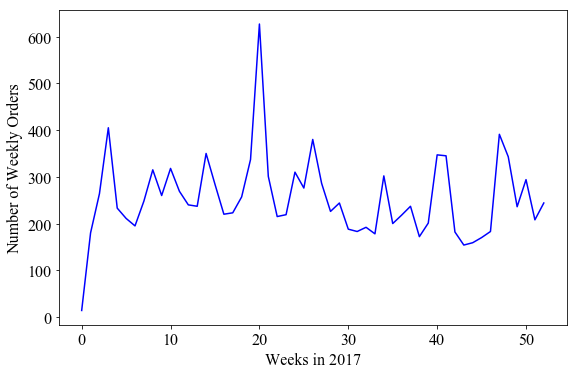

In [19]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'


fig = plt.figure(figsize=(8,5.2))

#plt.axis([0,lenmax,0,1.0])
#plt.title("Number of Citations in Baltimore")
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'Number of Weekly Orders')
plt.xlabel(r'Weeks in 2017')
plt.plot(weekly_orders.index.values,weekly_orders.values,color='b')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#fig.savefig("car-accidents.eps")
plt.show()

### (C) Compute the mean order value for gender 0 and for gender 1

In [20]:
df.head()

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1


In [21]:
groupedGender = df.groupby('gender')

#### Mean value for each gender group

In [22]:
groupedGender.get_group(0).order_count.mean()

1.5334694803721352

In [23]:
groupedGender.get_group(1).order_count.mean()

1.5228046289993193

#### Statistical Significance 

> In astronomy, we generally use the Kolmogorov–Smirnov (K-S) test to determine whether two samples are statistically different from each other or not. Let's do a K-S test for these two gender groups. 

In [24]:
from scipy import stats

In [25]:
stats.ks_2samp(groupedGender.get_group(0).order_count.values,groupedGender.get_group(1).order_count.values)

Ks_2sampResult(statistic=0.01837985023825739, pvalue=0.4427840079013693)

> **Due to the high `p` value, I do not think that the difference is significant.**

### (D) Confusion Matrix

In [26]:
rawdf.head()

,customer_id,gender,date,value,predicted_gender,order_time,order_week
0,1000,0,2017-01-01 00:11:31,198.5,1,2017-01-01 00:11:31,0
1,1001,0,2017-01-01 00:29:56,338.0,1,2017-01-01 00:29:56,0
2,1002,1,2017-01-01 01:30:31,733.0,1,2017-01-01 01:30:31,0
3,1003,1,2017-01-01 01:34:22,772.0,1,2017-01-01 01:34:22,0
4,1004,0,2017-01-01 03:11:54,508.0,1,2017-01-01 03:11:54,0


In [27]:
pd.crosstab(rawdf.gender,rawdf.predicted_gender)

predicted_gender,0,1
gender,,
0,3349,3410
1,1463,5249


In [28]:
pd.crosstab(rawdf.gender,rawdf.predicted_gender).apply(lambda row: row/row.sum(), axis=1)

predicted_gender,0,1
gender,,
0,0.495487,0.504513
1,0.217968,0.782032


In [29]:
cmatrix = pd.crosstab(rawdf.gender,rawdf.predicted_gender).apply(lambda row: row/row.sum(), axis=1)

In [30]:
import seaborn as sbn
import matplotlib.pyplot as plt

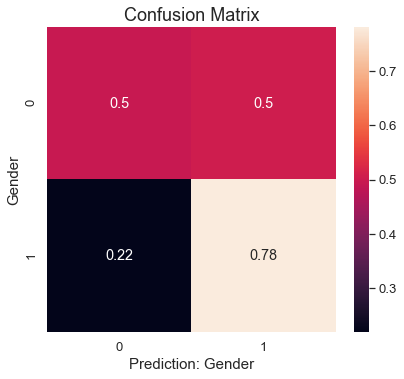

In [31]:
fig = plt.figure(figsize=(6,5.5))


sbn.set(font_scale=1.2)

hm = sbn.heatmap(cmatrix, annot=True)
hm.axes.set_title("Confusion Matrix",fontsize=18)
hm.set_xlabel('Prediction: Gender',fontsize=15)
hm.set_ylabel('Gender',fontsize=15)




#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tight_layout()
#plt.savefig('result.png')
#plt.savefig('result.pdf')

plt.show()

#### Discussion: 

> The prediction is poor; especially, it is close to a random guess for the gender=0 group. We need a **better hyperparameter tuning**, or have to try **other ML algorithms**. 

### (E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. 

> I have built a stand-alone **Spark/Hadoop cluster** and used **Dataproc** in Google Cloud Platform (GCP) for my Big Data research. Hence, my favorite tool is `PySpark`. Though `pandas` and `scikit-learn` are powerful and handy, their capabilities are intrinsically confined in a single node machine. As a data science project, I have solved the problem of Microsoft Malware Prediction using `PySpark`. Since the size of training sample is 8 millions, it is quite challenging to solve this problem using `scikit-learn`. Many tricks to optimize memory usages and reduce training times are required to solve this problem in a single node. Though, with many fancy tricks, only limited ML algorithms and rough hyperparameter tunings are applicable. Using `PySpark`, any such single-note limitations are gone. I could solve the problem more focusing on applying various MLs with better hyperparameter tunings than struggling with optimizing `pandas` and `scikit-learn`. One tradeoff is that learning `PySpark` is harder than learning `pandas` and `scikit-learn`.